: Write in your own words how does the EIG command work on pseudocode level (enough to explain the mathematics behind it). Also write out the main formulae in Jupyter Notebook.  

EIG command return the eigne values and eigen vector of square matrix.

Let be a square matrix. A non-zero vector v is an eigenvector for A with eigenvalue  $\lambda$ if \begin{equation} Av = \lambda v \end{equation}

We can write the above equation as 
$$
Av  - \lambda v =0 \
v(A  - \lambda I) =0
$$

where $I$ is the identity matrix of the same dimensions as A. Assuming that $v$ is not null-vectorThe last equation can be solved only when matrix A is singular, that is its determinant is zero. Therefore, to find the eigen vectors of A, we have to solve the following equation. 
$$
Det(A  - \lambda I) =0
\$$

<p>Choose</p> $u$=$v$=$[\vec{u_1},\vec{u_2}, ...,\vec{u_d}]$
<p>then, <br/></p>
$\sum =[ \vec{u_1},\vec{u_2}, ...,\vec{u_d}]
\begin{bmatrix} \lambda_i & 0 & 0 \\ 0 & \lambda_j & 0 \\ 0 & 0 & \lambda_d\end{bmatrix}[ \vec{u_1},\vec{u_2}, ..., \vec{u_d}]^T$ <br/>
$=[ \vec{u_1},\vec{u_2}, ...,\vec{u_d}].\begin{bmatrix} \lambda_1 u_1 \\ \lambda_2 u_2  \\ \vdots  \\  \lambda_d u_d\end{bmatrix}$ <br/>
$ = \lambda_1 u_1 u_1^T + \lambda_2 u_2 u_2^T+ \lambda_2 u_2 u_2^T+ .... +\lambda_d u_d u_d^T$ <br/>
$=\lambda_i u_i u_i^T  $
$  = \sum \limits _{i=1} ^{D}\lambda_i u_i u_i^T$

In [11]:
import numpy as np

np.random.seed(2342) # random seed for consistency

# A reader pointed out that Python 2.7 would raise a
# "ValueError: object of too small depth for desired array".
# This can be avoided by choosing a smaller random seed, e.g. 1
# or by completely omitting this line, since I just used the random seed for
# consistency.

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

Populating the interactive namespace from numpy and matplotlib


C:\Users\minds\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['interactive', 'Button', 'Text', 'f', 'Widget']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


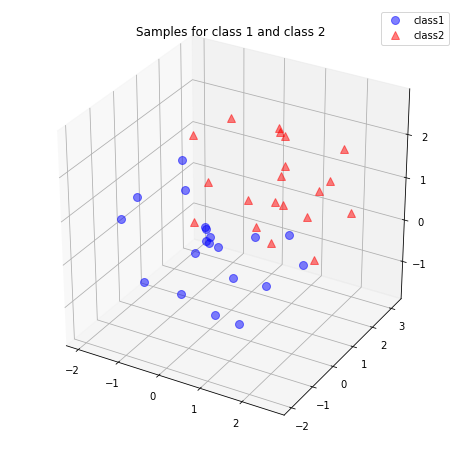

In [12]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [29]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"
print(all_samples.shape)
print(all_samples)

(3, 40)
[[-1.2573121   1.85438106  0.50512098  2.08466477 -0.72558063 -0.94123271
   0.55398543  0.43485794  0.43501581  0.3417954  -0.53144572 -0.17165524
  -1.58464924 -1.96798503  1.29840991 -0.2719323  -0.10051265  0.94384215
  -0.07840226  0.29041257  0.48249026  0.35810061  0.96735979  1.96496396
   1.6479174   2.64806311  2.10348562  0.23671994  0.55785456  0.8614741
   0.04565541  1.48916082  1.56784735  1.69162299  0.94710233  2.00807061
   1.1422335   0.2671438  -1.02312085  0.18082845]
 [-0.72222445  0.80265586  0.37790446 -0.37111751  0.1216762   1.60168665
   0.00696884 -0.58481603 -0.46000498 -1.94569883  0.82404547  0.2644999
  -1.0708913   0.3258994   0.13851467  0.50555515 -0.9071426  -1.96945582
  -0.53034167  1.57286511  2.36142095  2.82340104  1.02071546  0.68842849
   3.15483504  1.46531229  0.80515182  0.54477498  2.48645363  0.10362081
  -0.78025375  0.59397196  0.26957556  2.38907252  1.38573373  1.17403014
   0.82615205  1.65752048  1.19173851 -0.41295704]
 [-0

In [34]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)


Mean Vector:
 [[0.5314188 ]
 [0.54323193]
 [0.6832236 ]]



$s=\sum_{k=1}^n (x_k-m)(x_k-m)^T$

where,
$m=\frac{1}N \sum_{k=1}^n x_k$


In [38]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[45.33007655 12.84433229  9.92677937]
 [12.84433229 55.65888837  2.07758396]
 [ 9.92677937  2.07758396 49.92235982]]
[[ 0.18082845]
 [-0.41295704]
 [ 1.78047032]]


In [16]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[1.16230966 0.32934185 0.2545328 ]
 [0.32934185 1.42715098 0.05327138]
 [0.2545328  0.05327138 1.28006051]]


In [17]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[0.58539938]
 [0.69930378]
 [0.41022163]]
Eigenvalue 1 from scatter matrix: 67.62984339437116
Eigenvalue 1 from covariance matrix: 1.7340985485736198
Scaling factor:  38.99999999999999
----------------------------------------
Eigenvector 2: 
[[ 0.80100714]
 [-0.4206817 ]
 [-0.42592776]]
Eigenvalue 2 from scatter matrix: 33.305881013407
Eigenvalue 2 from covariance matrix: 0.8539969490617181
Scaling factor:  39.0
----------------------------------------
Eigenvector 3: 
[[ 0.12528016]
 [-0.57792831]
 [ 0.80641413]]
Eigenvalue 3 from scatter matrix: 49.97560033015183
Eigenvalue 3 from covariance matrix: 1.2814256494910725
Scaling factor:  39.0
----------------------------------------



$\sum_{v}^n (x_k-m)(x_k-m)^T$

In [18]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

Populating the interactive namespace from numpy and matplotlib


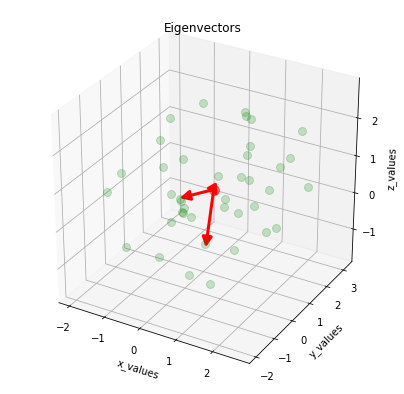

In [19]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [20]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

In [21]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

67.62984339437116
49.97560033015183
33.305881013407


In [22]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.58539938  0.12528016]
 [ 0.69930378 -0.57792831]
 [ 0.41022163  0.80641413]]


In [12]:
from pymc3 import *